<a href="https://colab.research.google.com/github/ManishSuhas0026/Deep-Learning/blob/main/2348530_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
def revenue_cost(w, x):
    return 0.5 * w**2 - 30 * w + 100

def gradient(w, x):
    return w - 30

In [3]:
w = 20
learning_rate = 0.1
momentum = 0.9
iterations = 3

In [4]:
velocity = 0

In [5]:
for i in range(iterations):
    grad = gradient(w, 0)
    velocity = momentum * velocity - learning_rate * grad
    w += velocity
    print(f"Iteration {i+1}: Optimal Price = {w}")

Iteration 1: Optimal Price = 21.0
Iteration 2: Optimal Price = 22.8
Iteration 3: Optimal Price = 25.14


In [6]:
print(f"Final Optimal Price = {w}")

Final Optimal Price = 25.14


**2**

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from sklearn import model_selection
from keras.layers import Dropout
from keras.optimizers import Adam

In [9]:
df = pd.read_csv('//content/heart.csv')

In [10]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
print( 'Shape of DataFrame: {}'.format(df.shape))
print (df.loc[1])

Shape of DataFrame: (303, 14)
age          37.0
sex           1.0
cp            2.0
trtbps      130.0
chol        250.0
fbs           0.0
restecg       1.0
thalachh    187.0
exng          0.0
oldpeak       3.5
slp           0.0
caa           0.0
thall         2.0
output        1.0
Name: 1, dtype: float64


In [13]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


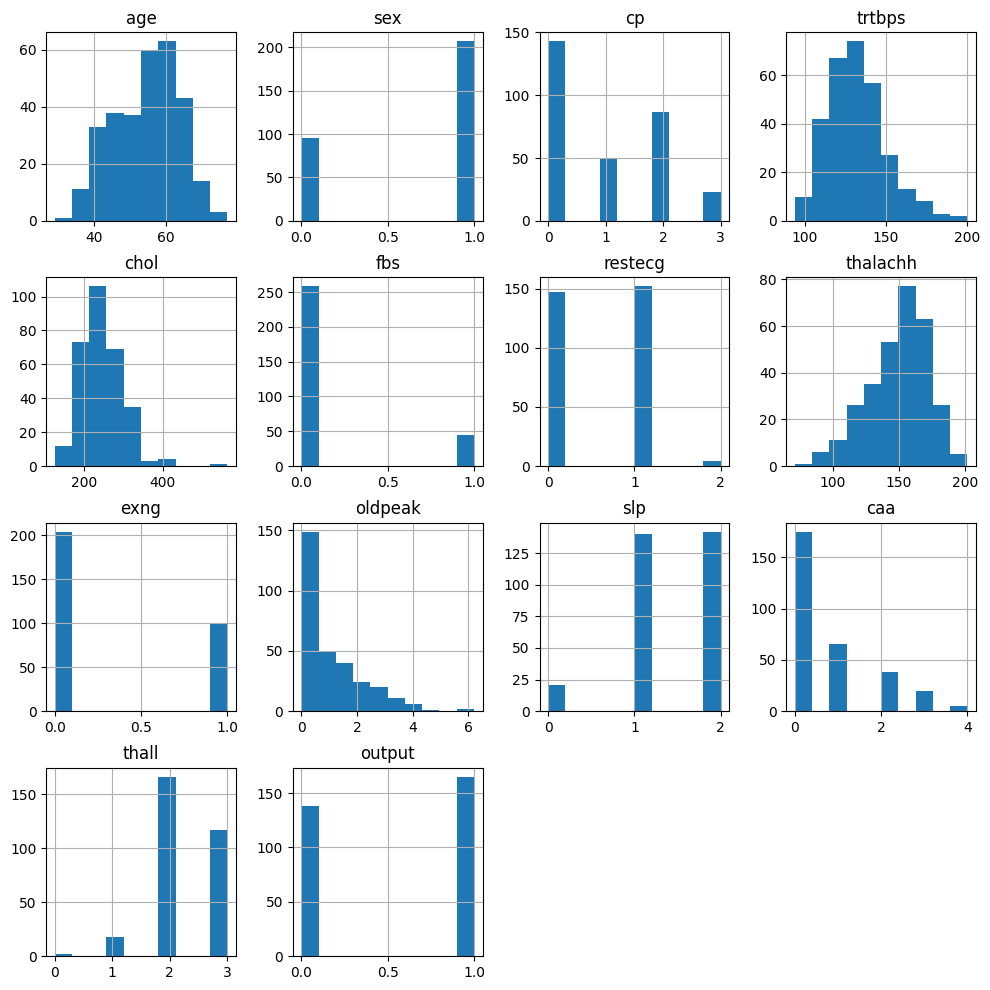

In [14]:
df.hist(figsize = (12, 12))
plt.show()

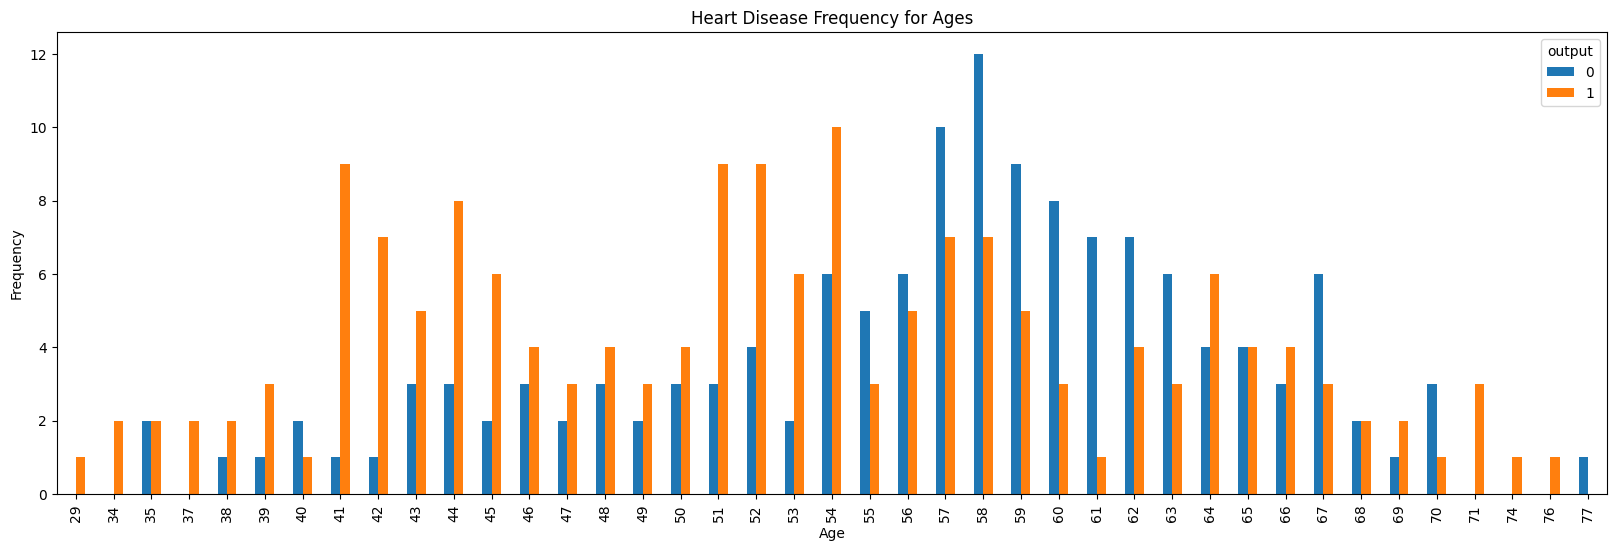

In [15]:
pd.crosstab(df.age,df.output).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

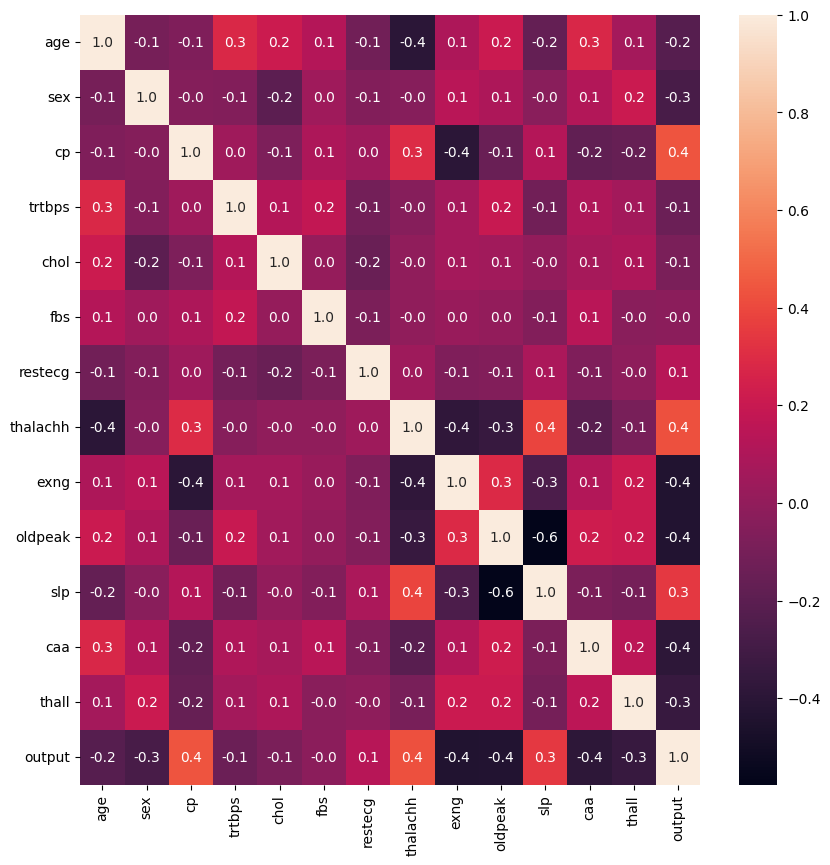

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

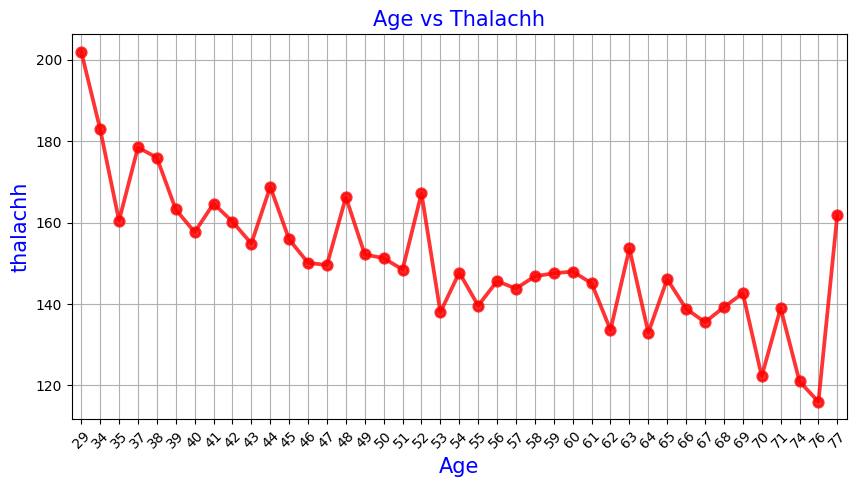

In [19]:
age_unique=sorted(df.age.unique())
age_thalach_values=df.groupby('age')['thalachh'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(df[df['age']==age].thalachh)/age_thalach_values[i])

plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('thalachh',fontsize = 15,color='blue')
plt.title('Age vs Thalachh',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [20]:
X = np.array(df.drop(['output'], 1))
y = np.array(df['output'])

<ipython-input-20-f375fdf39425>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['output'], 1))


In [21]:
X[0]

array([ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
         2.3,   0. ,   0. ,   1. ])

In [22]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [23]:
X[0]

array([ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
        2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
       -2.27457861, -0.71442887, -2.14887271])

In [24]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size = 0.2)

In [25]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(242, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [26]:
X_train[0]

array([ 1.61392956, -1.46841752,  1.97312292,  0.47839125, -0.14038081,
       -0.41763453,  0.89896224,  0.05917329, -0.69663055,  0.65599028,
        0.97635214,  1.24459328, -0.51292188])

In [28]:
def create_model():
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                224       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 378 (1.48 KB)
Trainable params: 378 (1.48 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [30]:
print(X_train.shape)

(242, 13)


In [29]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=50, batch_size=10, verbose=0)

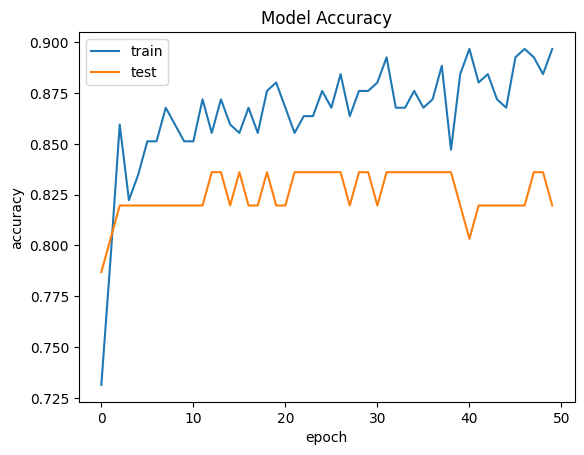

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

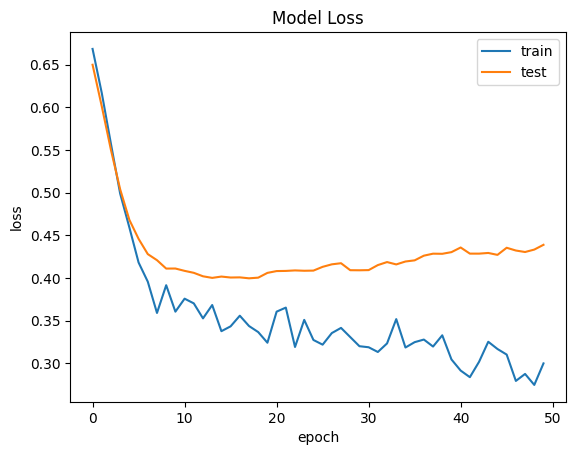

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [33]:
categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))

2/2 [==============================] - 0s 8ms/step
Results for Categorical Model
0.819672131147541
